## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Ingestion and Data Cleaning

In [2]:
df = pd.read_csv('sat_gpa_v1.csv')

In [3]:
df.head()

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   fy_gpa   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [5]:
df.describe()

,sat_sum,fy_gpa
count,1000.000000,1000.000000
mean,1033.290000,2.467950
std,142.873681,0.740805
min,530.000000,0.000000
25%,930.000000,1.980000
50%,1030.000000,2.465000
75%,1130.000000,3.020000
max,1440.000000,4.000000


In [6]:
df.isna().sum()

sat_sum    0
fy_gpa     0
dtype: int64

In [7]:
df.duplicated().sum()

49

In [8]:
df_clean = df.drop_duplicates()

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  951 non-null    int64  
 1   fy_gpa   951 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 22.3 KB


In [10]:
df_clean.describe()

,sat_sum,fy_gpa
count,951.000000,951.000000
mean,1034.248160,2.467739
std,144.351316,0.748035
min,530.000000,0.000000
25%,930.000000,1.965000
50%,1030.000000,2.470000
75%,1130.000000,3.035000
max,1440.000000,4.000000


## Scatter plot representing the relationship between GPA and SAT scores


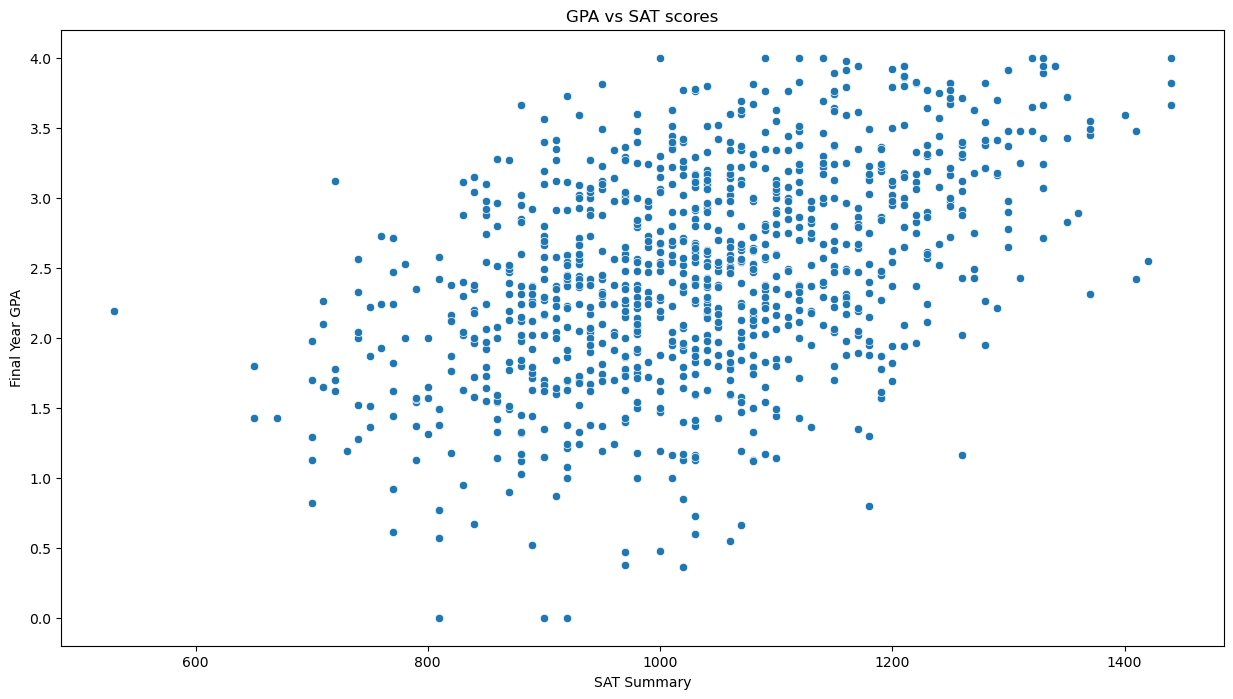

0.45767832411961096

In [20]:
plt.figure(figsize = (15,8))
sns.scatterplot(x=df_clean['sat_sum'], y=df_clean['fy_gpa'])
plt.title('GPA vs SAT scores')
plt.xlabel('SAT Summary')
plt.ylabel('Final Year GPA')
plt.show()

#correlation coefficient
r = np.corrcoef(df_clean['sat_sum'], df_clean['fy_gpa'])
r[0,1]

# Building linear regression model 

In [12]:
import statsmodels.api as sm
X = df_clean['sat_sum']
Y = df_clean['fy_gpa']
X = sm.add_constant(X) # Add constant to make model accurate

In [13]:
#Create model
model = sm.OLS(Y,X)

In [14]:
#Fit the model onto the data
model = model.fit()

## Deploy

In [15]:
#print the regression equation
coefficients =  model.params
coefficients

const      0.014803
sat_sum    0.002372
dtype: float64

In [16]:
print(f'The regression equation is: fy_gpa = {coefficients.iloc[0]:.3f} + {coefficients.iloc[1]:.3f}*sat_sum')

The regression equation is: fy_gpa = 0.015 + 0.002*sat_sum


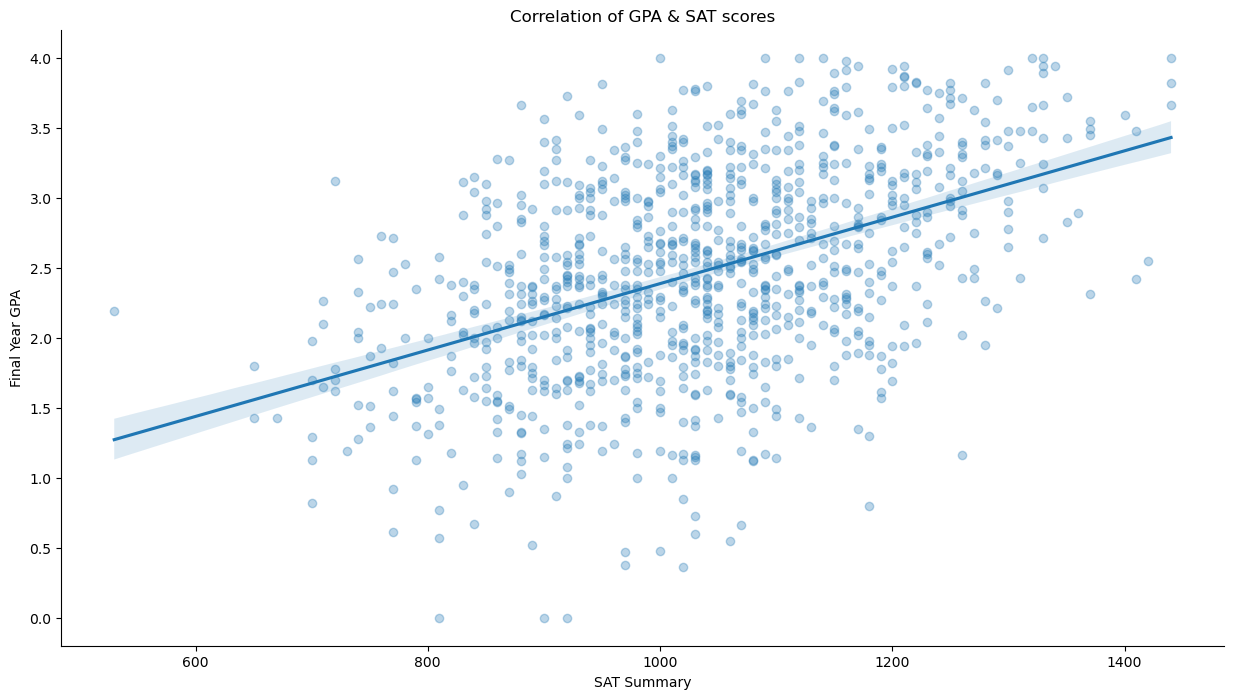

In [17]:
plt.figure(figsize = (15,8))
sns.regplot(data = df_clean, x='sat_sum', y='fy_gpa', scatter_kws = {'alpha':0.3})
plt.title('Correlation of GPA & SAT scores')
plt.xlabel('SAT Summary')
plt.ylabel('Final Year GPA')
sns.despine()

## Statistical interpretation of regression model results

In [18]:
#Regression 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fy_gpa   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     251.5
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.06e-50
Time:                        13:20:46   Log-Likelihood:                -961.06
No. Observations:                 951   AIC:                             1926.
Df Residuals:                     949   BIC:                             1936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0148      0.156      0.095      0.925      -0.292       0.321
sat_sum        0.0024      0.000     15.857      0.000       0.002       0.003
==============================================================================
Omnibus:                       15.144   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.574
Skew:                          -0.313   Prob(JB):                     0.000415
Kurtosis:                       3.013   Cond. No.                     7.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""